In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
P = np.diag([1000.0, 1000.0, 1000.0, 1000.0])
print(P, P.shape)

[[1000.    0.    0.    0.]
 [   0. 1000.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]] (4, 4)


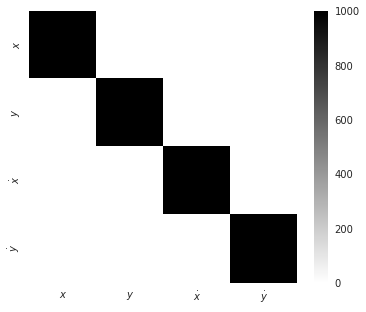

In [3]:
fig = plt.figure(figsize=(6, 5))
sns.heatmap(P,cmap="binary",yticklabels=['$x$', '$y$', '$\dot x$', '$\dot y$'],
           xticklabels=['$x$', '$y$', '$\dot x$', '$\dot y$'])
plt.show()

In [4]:
dt = 0.1

A = np.matrix([[1.0, 0.0, dt, 0.0],
              [0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
print(A, A.shape)

# H = measurement matrix

H = np.matrix([[0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 1.0]])
print(H, H.shape)

[[1.  0.  0.1 0. ]
 [0.  1.  0.  0.1]
 [0.  0.  1.  0. ]
 [0.  0.  0.  1. ]] (4, 4)
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]] (2, 4)


In [5]:
ra = 10.0**2

# R = noise covariance

R = np.matrix([[ra, 0.0],
              [0.0, ra]])
print(R, R.shape)

[[100.   0.]
 [  0. 100.]] (2, 2)


In [6]:
# Q = measurement uncertainty

sv = 8.8

G = np.matrix([[0.5*dt**2],
               [0.5*dt**2],
               [dt],
               [dt]])

Q = G*G.T*sv**2

In [7]:
Q

matrix([[0.001936, 0.001936, 0.03872 , 0.03872 ],
        [0.001936, 0.001936, 0.03872 , 0.03872 ],
        [0.03872 , 0.03872 , 0.7744  , 0.7744  ],
        [0.03872 , 0.03872 , 0.7744  , 0.7744  ]])

In [8]:
I = np.eye(4)
I

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Standard Deviation of Acceleration Measurements=0.94
You assumed 100.00 in R.


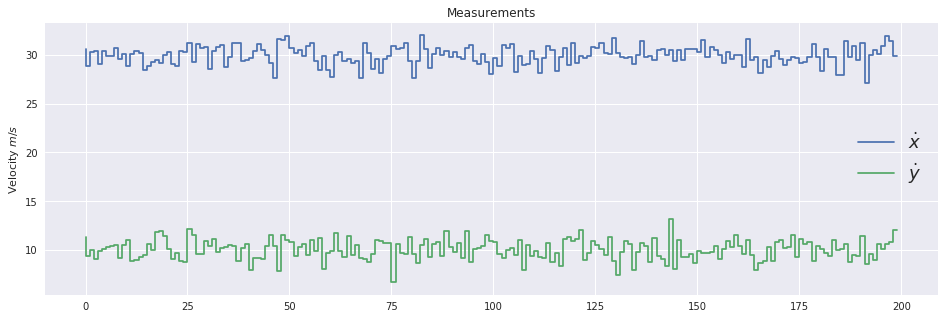

In [9]:
m = 200 # Measurements
vx= 30 # in X
vy= 10 # in Y

mx = np.array(vx+np.random.randn(m))
my = np.array(vy+np.random.randn(m))

measurements = np.vstack((mx,my))

print('Standard Deviation of Acceleration Measurements=%.2f' % np.std(mx))
print('You assumed %.2f in R.' % R[0,0])


fig = plt.figure(figsize=(16,5))

plt.step(range(m),mx, label='$\dot x$')
plt.step(range(m),my, label='$\dot y$')
plt.ylabel(r'Velocity $m/s$')
plt.title('Measurements')
plt.legend(loc='best',prop={'size':18})
plt.show()

In [10]:
x = np.matrix([[0.0, 0.0, 0.0, 0.0]]).T
stacked = []
for n in range(measurements.shape[1]):
    x = A*x
    P = A*P*A.T + Q
    S = H*P*H.T + R
    K = (P*H.T) * np.linalg.pinv(S)
    Z = measurements[:,n].reshape(2,1)
    y = Z - (H*x)
    x = x + (K*y)
    P = (I - (K*H))*P
    stacked.append(x)
stacked = np.array(stacked)[:,:,0]

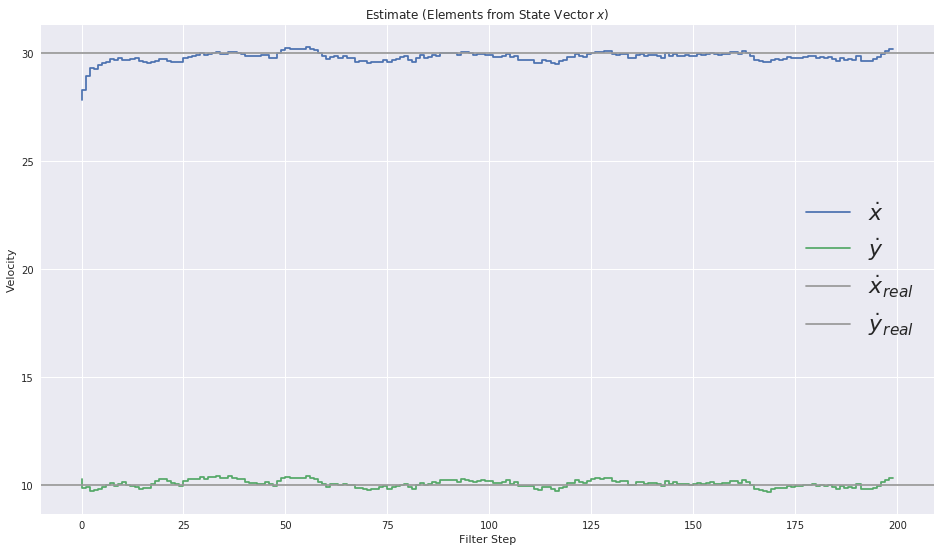

In [11]:
plt.figure(figsize=(16,9))
plt.step(range(len(measurements[0])),stacked[:,2], label='$\dot x$')
plt.step(range(len(measurements[0])),stacked[:,3], label='$\dot y$')

plt.axhline(vx, color='#999999', label='$\dot x_{real}$')
plt.axhline(vy, color='#999999', label='$\dot y_{real}$')

plt.xlabel('Filter Step')
plt.title('Estimate (Elements from State Vector $x$)')
plt.legend(loc='best',prop={'size':22})
plt.ylabel('Velocity')
plt.show()

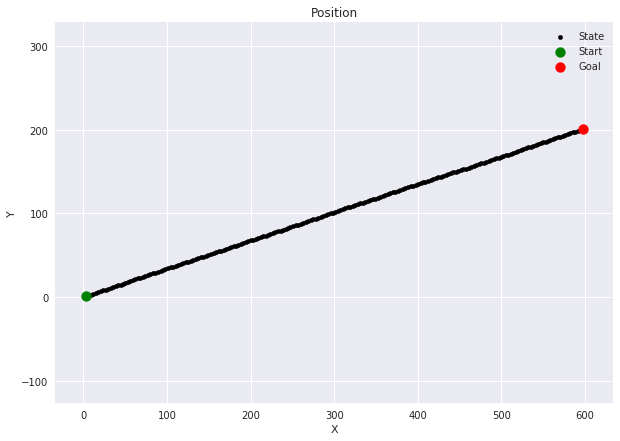

In [12]:
plt.figure(figsize=(10,7))
scatter = stacked
plt.scatter(scatter[:,0], scatter[:,1], s=20, label='State', c='k')
    
plt.scatter(scatter[0,0], scatter[0,1], s=100, label='Start', c='g')
plt.scatter(scatter[-1,0], scatter[-1,1], s=100, label='Goal', c='r')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Position')
plt.legend(loc='best')
plt.axis('equal')
plt.show()

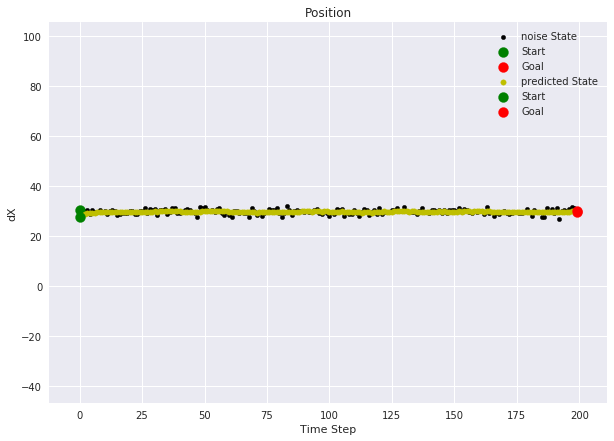

In [13]:
time_stamp = np.arange(200)
fig = plt.figure(figsize=(10,7))
plt.scatter(time_stamp,measurements[0], s=20, label='noise State', c='k')

dxt = stacked[:,2]
    
plt.scatter(time_stamp[0],measurements[0][0], s=100, label='Start', c='g')
plt.scatter(time_stamp[-1],measurements[0][-1], s=100, label='Goal', c='r')
   
plt.scatter(time_stamp,dxt, s=30, label='predicted State', c='y')
    
plt.scatter(time_stamp[0],dxt[0], s=100, label='Start', c='g')
plt.scatter(time_stamp[-1],dxt[-1], s=100, label='Goal', c='r')

plt.xlabel('Time Step')
plt.ylabel('dX')
plt.title('Position')
plt.legend(loc='best')
plt.axis('equal')
plt.show()

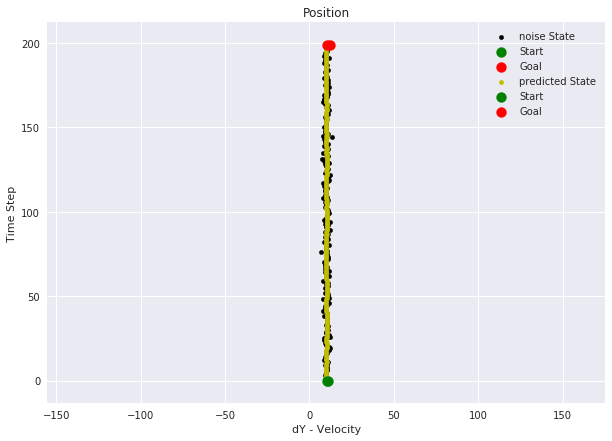

In [14]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(measurements[1],time_stamp, s=20, label='noise State', c='k')
    
plt.scatter(measurements[1][0],time_stamp[0], s=100, label='Start', c='g')
plt.scatter(measurements[1][-1],time_stamp[-1], s=100, label='Goal', c='r')

dyt = stacked[:,3]
   
plt.scatter(dyt,time_stamp, s=20, label='predicted State', c='y')
plt.scatter(dyt[0],time_stamp[0], s=100, label='Start', c='g')
plt.scatter(dyt[-1],time_stamp[-1], s=100, label='Goal', c='r')

plt.xlabel('dY - Velocity')
plt.ylabel('Time Step')
plt.title('Position')
plt.legend(loc='best')
plt.axis('equal')
plt.show()

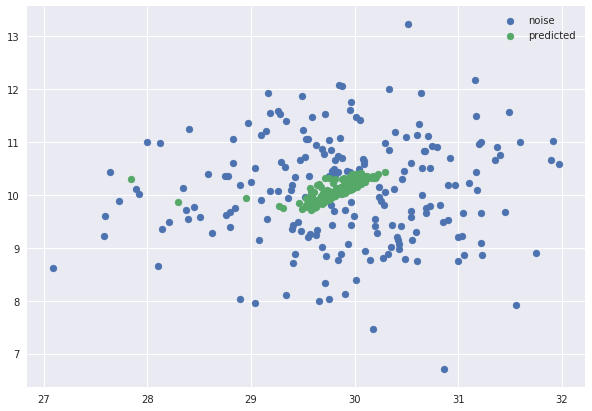

In [15]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(measurements[0],measurements[1],label='noise')
plt.scatter(dxt,dyt,label='predicted')
plt.legend()
plt.show()